# adding Gaussian Noise


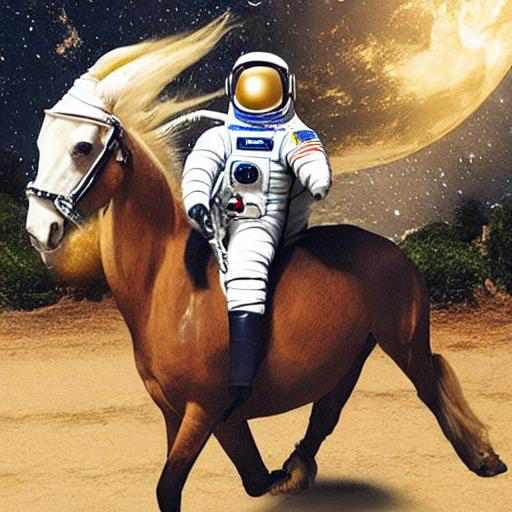

In [1]:
from PIL import Image, ImageFilter # PIL is a popular image processing package "pillow"

import numpy as np

def add_gaussian_noise(image, mean=0, std=25): # std: standard deviation (magnitude of the noise)
    img_array = np.array(image)
    h, w, c = img_array.shape
    noise = np.random.normal(mean, std, (h, w, c)).astype(np.uint8)
    noisy_image = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(noisy_image)

# Load the image
inp_img = Image.open(r"d:\dev\ai\robimg\outputs\astronaut_rides_horse-1971a27b.jpg")
display(inp_img)

In [8]:
# stable diffusion model by default uses 512x512 as image size. each pixel need 3 floats for R/G/B colors. EAch image need 3D array 512x512x3.
# the color value ranges in [0, 255]

8

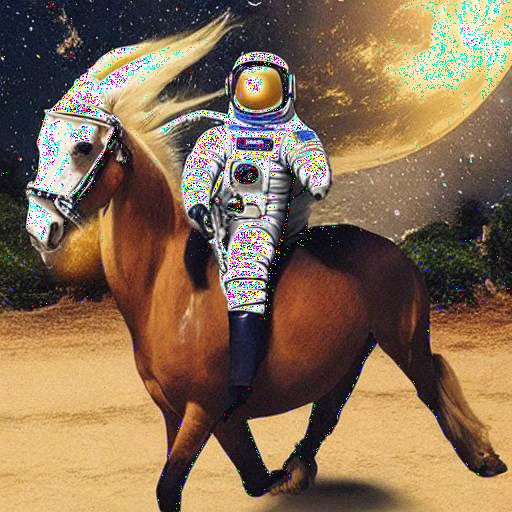

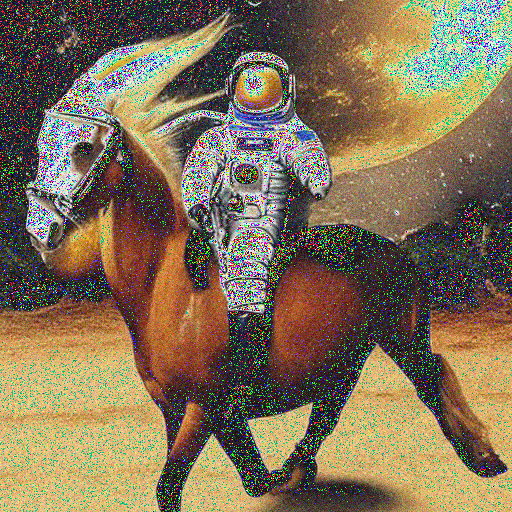

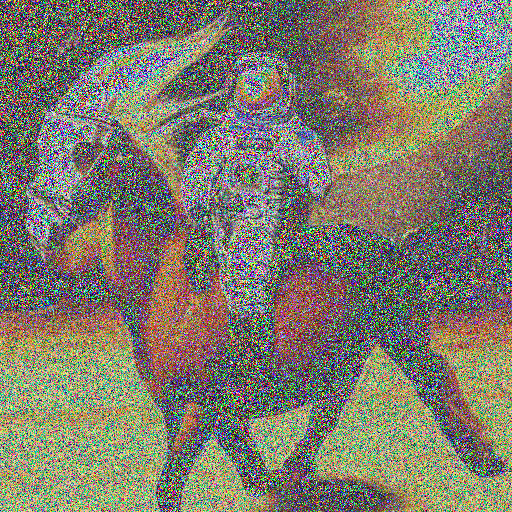

In [2]:

# Add Gaussian noise to the image
for std in [5, 20, 50]:
    noisy_image = add_gaussian_noise(inp_img, std=std)
    #denoised_image = noisy_image.filter(ImageFilter.GaussianBlur(2))

    display(noisy_image)
    #display(denoised_image)


# denoising

In [11]:
import cv2
from matplotlib import pyplot as plt

def denoise(noise_level: int):
    noisy_image = add_gaussian_noise(inp_img, std=noise_level)
    noisy_image.save(r"d:\dev\ai\robimg\outputs\astro-noisy.jpg")
    
    img_in = cv2.imread(r"d:\dev\ai\robimg\outputs\astro-noisy.jpg")

    img_out = cv2.fastNlMeansDenoisingColored(img_in, None, 10, 10, 7, 15)
    
    #display(noisy_image)
    #display(img_out_pil)
    plt.subplot(121),  plt.imshow(img_in)
    plt.subplot(122), plt.imshow(img_out)

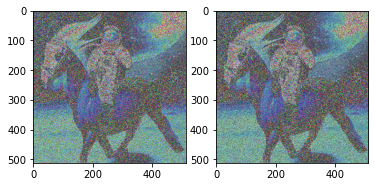

In [13]:
denoise(50)

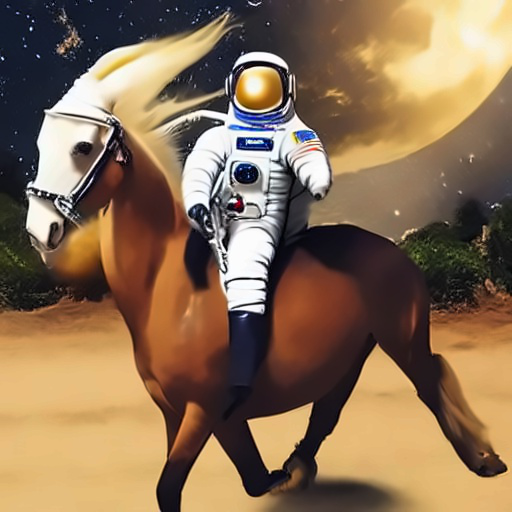

In [8]:
img_out_pil